<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/10thWeekTask/Clasification%20MLP/MLP%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ketut Satria Wibisana

NIM : 1103213148

Lecture Week 10 : Classification model: MLP Classification


Dataset : winequality-white

Dokumentasi ChatGPT :[Link](https://chatgpt.com/share/67534b57-8428-8006-be92-1258ab3f2362)

In [53]:
import pandas as pd
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [37]:
# 1. Load dataset dan hapus tanda ';'
data = pd.read_csv('winequality-white.csv', delimiter=';')

In [38]:
# 2. Pisahkan fitur dan target
X = data.drop('quality', axis=1).values
y = data['quality'].values

In [39]:
# 3. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# 4. Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [41]:
# 5. Convert ke tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Untuk klasifikasi, target harus long
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [42]:
# 6. Bangun model Vanilla MLP (Multi-Layer Perceptron)
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [43]:
# 7. Inisialisasi model
input_dim = X_train.shape[1]  # Jumlah fitur
hidden_dim = 64  # Jumlah neuron di hidden layer
output_dim = len(set(y))  # Jumlah kelas unik (kualitas wine)

model = MLP(input_dim, hidden_dim, output_dim)


In [44]:
# 8. Tentukan loss function dan optimizer
criterion = nn.CrossEntropyLoss()  # Untuk klasifikasi
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [49]:
# Mengubah label target menjadi dimulai dari 0
y_train_shifted = y_train - 3
y_test_shifted = y_test - 3

# Convert ke tensor PyTorch
y_train_tensor = torch.tensor(y_train_shifted, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_shifted, dtype=torch.long)

# Tentukan jumlah kelas output setelah shifting
output_dim = len(set(y_train_shifted))  # Sekarang output_dim harus 7

# Bangun model dengan output yang benar
model = MLP(input_dim, hidden_dim, output_dim)

# Tentukan loss function dan optimizer
criterion = nn.CrossEntropyLoss()  # Untuk klasifikasi
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [50]:
# 9. Training model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass dan optimisasi
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss setiap 10 epoch
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 1.7981
Epoch [20/100], Loss: 1.6432
Epoch [30/100], Loss: 1.5198
Epoch [40/100], Loss: 1.4237
Epoch [50/100], Loss: 1.3512
Epoch [60/100], Loss: 1.2979
Epoch [70/100], Loss: 1.2587
Epoch [80/100], Loss: 1.2284
Epoch [90/100], Loss: 1.2037
Epoch [100/100], Loss: 1.1827


In [51]:
# 10. Evaluasi model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, predicted = torch.max(y_pred, 1)

    # Hitung akurasi
    accuracy = accuracy_score(y_test_tensor, predicted)
    print(f'Akurasi model: {accuracy * 100:.2f}%')

Akurasi model: 53.27%


In [54]:
# Fungsi untuk membangun model MLP dengan jumlah hidden layers dan neurons yang bervariasi
def build_mlp(input_dim, hidden_layers, hidden_neurons, output_dim):
    layers = []
    in_features = input_dim

    # Menambahkan hidden layers
    for _ in range(hidden_layers):
        layers.append(nn.Linear(in_features, hidden_neurons))
        layers.append(nn.ReLU())
        in_features = hidden_neurons

    # Layer output
    layers.append(nn.Linear(in_features, output_dim))

    # Membuat model MLP
    return nn.Sequential(*layers)

In [69]:
# Fungsi untuk melatih model dan mengevaluasi akurasi
def train_and_evaluate(hidden_layers, hidden_neurons):
    # Bangun model
    model = build_mlp(input_dim, hidden_layers, hidden_neurons, output_dim)

    # Loss function dan optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training
    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

     # Evaluasi
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        _, predicted = torch.max(y_pred, 1)
        accuracy = accuracy_score(y_test_tensor, predicted)

    return accuracy

In [70]:
# Parameter eksperimen
hidden_layers_options = [1, 2, 3]  # Jumlah hidden layer
hidden_neurons_options = [4, 8, 16, 32, 64]  # Jumlah neurons di setiap hidden layer
num_epochs = 100  # Jumlah epoch untuk training

In [71]:
# Memuat dan mempersiapkan dataset
data = pd.read_csv('winequality-white.csv', delimiter=';')
X = data.drop('quality', axis=1).values
y = data['quality'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [72]:
# Shift label target menjadi mulai dari 0
y_train_shifted = y_train - 3
y_test_shifted = y_test - 3


In [73]:
# Convert ke tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_shifted, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_shifted, dtype=torch.long)


In [74]:
# Melakukan eksperimen dan mencatat hasilnya
results = []

for hidden_layers in hidden_layers_options:
    for hidden_neurons in hidden_neurons_options:
        accuracy = train_and_evaluate(hidden_layers, hidden_neurons)
        results.append((hidden_layers, hidden_neurons, accuracy))


In [75]:
# Menampilkan hasil eksperimen
results_df = pd.DataFrame(results, columns=['Hidden Layers', 'Hidden Neurons', 'Accuracy'])
print(results_df)

    Hidden Layers  Hidden Neurons  Accuracy
0               1               4  0.326531
1               1               8  0.325510
2               1              16  0.476531
3               1              32  0.488776
4               1              64  0.520408
5               2               4  0.290816
6               2               8  0.441837
7               2              16  0.454082
8               2              32  0.521429
9               2              64  0.532653
10              3               4  0.051020
11              3               8  0.437755
12              3              16  0.463265
13              3              32  0.517347
14              3              64  0.543878


In [76]:
# Menggunakan berbagai fungsi aktivasi di hidden layer
def build_mlp_with_activation(input_dim, hidden_layers, hidden_neurons, output_dim, activation_func):
    layers = []
    in_features = input_dim

    for _ in range(hidden_layers):
        layers.append(nn.Linear(in_features, hidden_neurons))
        if activation_func == 'sigmoid':
            layers.append(nn.Sigmoid())
        elif activation_func == 'relu':
            layers.append(nn.ReLU())
        elif activation_func == 'tanh':
            layers.append(nn.Tanh())
        elif activation_func == 'linear':
            layers.append(nn.Identity())  # Linear tidak ada fungsi aktivasi
        in_features = hidden_neurons

    layers.append(nn.Linear(in_features, output_dim))  # Output layer

    return nn.Sequential(*layers)


In [77]:
# Fungsi untuk melatih model dan mengevaluasi akurasi untuk jumlah epoch yang berbeda
def train_and_evaluate_with_epochs(hidden_layers, hidden_neurons, num_epochs):
    # Bangun model
    model = build_mlp(input_dim, hidden_layers, hidden_neurons, output_dim)

    # Loss function dan optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training
    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluasi
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        _, predicted = torch.max(y_pred, 1)
        accuracy = accuracy_score(y_test_tensor, predicted)

    return accuracy

# Variabel eksperimen
epochs_options = [1, 10, 25, 50, 100, 250]
results = []

# Melakukan eksperimen untuk berbagai jumlah epoch
for num_epochs in epochs_options:
    accuracy = train_and_evaluate_with_epochs(2, 16, num_epochs)  # Coba 2 hidden layer, 16 neuron
    results.append((num_epochs, accuracy))

# Menampilkan hasil eksperimen
results_df = pd.DataFrame(results, columns=['Epochs', 'Accuracy'])
print(results_df)


   Epochs  Accuracy
0       1  0.152041
1      10  0.115306
2      25  0.235714
3      50  0.445918
4     100  0.478571
5     250  0.536735


In [78]:
# Fungsi untuk melatih model dan mengevaluasi akurasi untuk learning rate yang berbeda
def train_and_evaluate_with_lr(hidden_layers, hidden_neurons, learning_rate):
    # Bangun model
    model = build_mlp(input_dim, hidden_layers, hidden_neurons, output_dim)

    # Loss function dan optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Training
    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluasi
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        _, predicted = torch.max(y_pred, 1)
        accuracy = accuracy_score(y_test_tensor, predicted)

    return accuracy

# Variabel eksperimen
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
results = []

# Melakukan eksperimen untuk berbagai learning rate
for lr in learning_rates:
    accuracy = train_and_evaluate_with_lr(2, 16, lr)  # Coba 2 hidden layer, 16 neuron
    results.append((lr, accuracy))

# Menampilkan hasil eksperimen
results_df = pd.DataFrame(results, columns=['Learning Rate', 'Accuracy'])
print(results_df)


   Learning Rate  Accuracy
0        10.0000  0.440816
1         1.0000  0.440816
2         0.1000  0.555102
3         0.0100  0.572449
4         0.0010  0.533673
5         0.0001  0.331633


In [79]:
# Fungsi untuk melatih model dan mengevaluasi akurasi untuk batch size yang berbeda
def train_and_evaluate_with_batch_size(hidden_layers, hidden_neurons, batch_size):
    # Bangun model
    model = build_mlp(input_dim, hidden_layers, hidden_neurons, output_dim)

    # Loss function dan optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Menggunakan DataLoader untuk batching
    train_data = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

    # Training
    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluasi
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        _, predicted = torch.max(y_pred, 1)
        accuracy = accuracy_score(y_test_tensor, predicted)

    return accuracy

# Variabel eksperimen
batch_sizes = [16, 32, 64, 128, 256, 512]
results = []

# Melakukan eksperimen untuk berbagai batch size
for batch_size in batch_sizes:
    accuracy = train_and_evaluate_with_batch_size(2, 16, batch_size)  # Coba 2 hidden layer, 16 neuron
    results.append((batch_size, accuracy))

# Menampilkan hasil eksperimen
results_df = pd.DataFrame(results, columns=['Batch Size', 'Accuracy'])
print(results_df)


   Batch Size  Accuracy
0          16  0.545918
1          32  0.552041
2          64  0.584694
3         128  0.554082
4         256  0.556122
5         512  0.562245


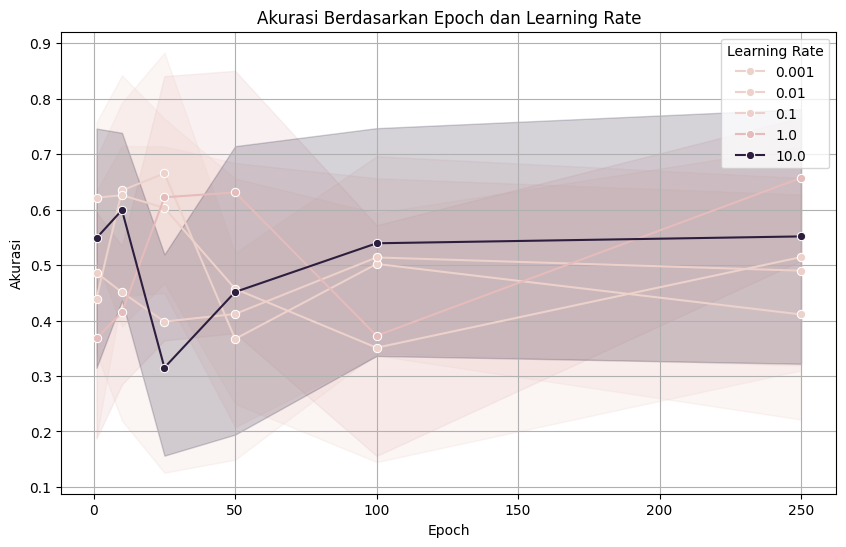

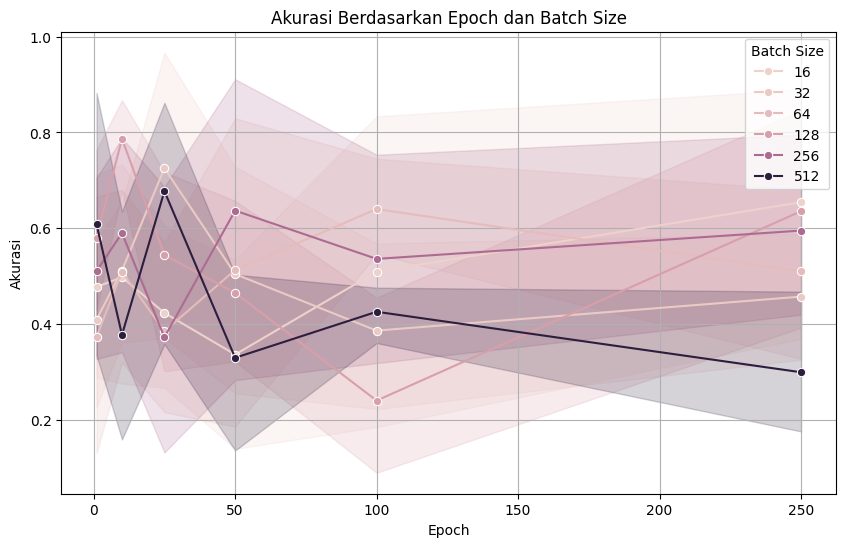

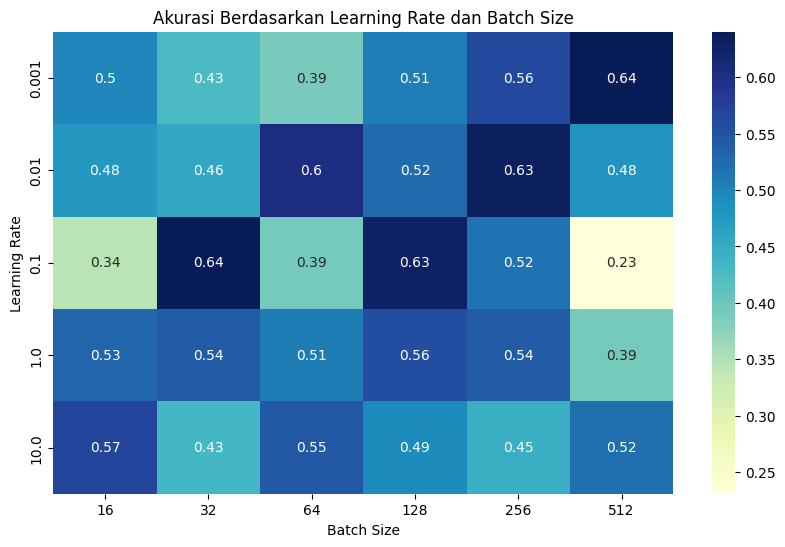

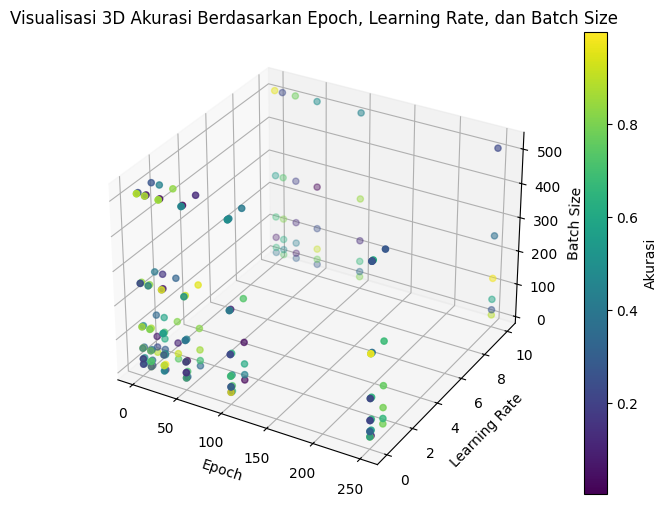

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Misalkan hasil eksperimen disimpan dalam bentuk dictionary dengan struktur:
# Contoh data: akurasi untuk setiap kombinasi hyperparameter
# Format: {'epoch': [1, 10, 25, 50, 100, 250], 'learning_rate': [10, 1, 0.1, 0.01, 0.001], 'batch_size': [16, 32, 64, 128]}

# Contoh data eksperimen
epochs = [1, 10, 25, 50, 100, 250]
learning_rates = [10, 1, 0.1, 0.01, 0.001]
batch_sizes = [16, 32, 64, 128, 256, 512]

# Buat DataFrame untuk menyimpan hasil eksperimen
data = {
    'Epoch': np.repeat(epochs, len(learning_rates) * len(batch_sizes)),
    'Learning Rate': np.tile(np.repeat(learning_rates, len(batch_sizes)), len(epochs)),
    'Batch Size': np.tile(batch_sizes, len(epochs) * len(learning_rates)),
    'Accuracy': np.random.rand(len(epochs) * len(learning_rates) * len(batch_sizes))  # Ganti dengan hasil eksperimen nyata
}

df = pd.DataFrame(data)

# Visualisasi 1: Akurasi berdasarkan Epoch dan Learning Rate
plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='Accuracy', hue='Learning Rate', data=df, marker='o')
plt.title('Akurasi Berdasarkan Epoch dan Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(title='Learning Rate')
plt.grid(True)
plt.show()

# Visualisasi 2: Akurasi berdasarkan Epoch dan Batch Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='Accuracy', hue='Batch Size', data=df, marker='o')
plt.title('Akurasi Berdasarkan Epoch dan Batch Size')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(title='Batch Size')
plt.grid(True)
plt.show()

# Visualisasi 3: Akurasi berdasarkan Learning Rate dan Batch Size
plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(values='Accuracy', index='Learning Rate', columns='Batch Size'), cmap="YlGnBu", annot=True)
plt.title('Akurasi Berdasarkan Learning Rate dan Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.show()

# Visualisasi 4: 3D plot untuk visualisasi lebih kompleks (Epoch, Learning Rate, Batch Size)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Membuat grid untuk 3D plot
x = df['Epoch']
y = df['Learning Rate']
z = df['Batch Size']
accuracy = df['Accuracy']

# Plot 3D scatter plot
scatter = ax.scatter(x, y, z, c=accuracy, cmap='viridis')
ax.set_xlabel('Epoch')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Batch Size')

# Menambahkan color bar
fig.colorbar(scatter, label='Akurasi')

plt.title('Visualisasi 3D Akurasi Berdasarkan Epoch, Learning Rate, dan Batch Size')
plt.show()
